# Búsqueda de raíces
Los métodos implementados son los siguientes:
- Método de dicotomía: `dicotomia`.
- Método de regula falsi: `regula_falsi`.
- Método de la secante: `secante`.
- Método de Newton: `newton`.
- Método de punto fijo: `punto_fijo`.

In [1]:
from numpy import *
from matplotlib.pyplot import *

## Problema propuesto
Hallar la raíz de la función $f(x) = x - e^{-x}$ en el intervalo $[0, 1]$.

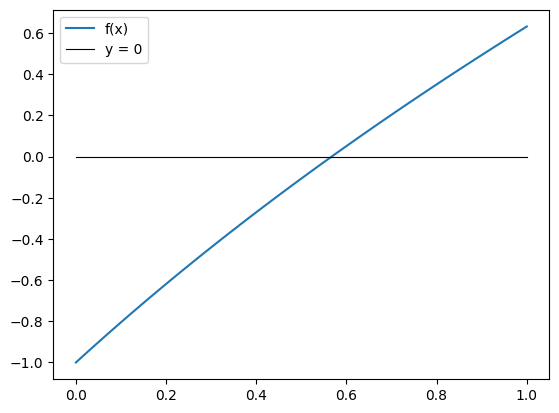

In [2]:
def f(x):
    return x - exp(-x)

x = linspace(0, 1, 100)
plot(x, f(x))
plot(x, 0*x, color = "black", linewidth = 0.8)
legend(["f(x)", "y = 0"])
show()

## Método de dicotomía
Sea $[a, b]$ un intervalo y sea $f$ una función continua en $[a, b]$.
Supongamos que $f$ tiene un único cero $l$ en $[a, b]$ y además
$$f(a)f(b) < 0.$$

Sean $a_0 = a$ y $b_0 = b$.
Para $n = 0, 1, 2, \dots$, calculamos
$$c_n = \frac{a_n + b_n}{2}.$$
- Si $f(c_n) = 0$, entonces $l = c_n$ y se detiene el algoritmo.
- Si $f(a_n)f(c_n) < 0$, definimos
    $$a_{n+1} = a_n, \quad b_{n+1} = c_n.$$
- En otro caso, definimos
    $$a_{n+1} = c_n, \quad b_{n+1} = b_n.$$

In [3]:
def dicotomia(f, a, b, tolerancia = 1e-7, iteraciones = 100):
    if f(a)*f(b) >= 0:
        print("No se puede aplicar el método de dicotomía.")
        return None
    an, bn = a, b
    for iteracion in range(iteraciones):
        cn = (an + bn)/2
        fcn = f(cn)
        if fcn == 0:
            print("Se ha encontrado la raíz.")
            return cn
        elif abs(fcn) <= tolerancia:
            print("Se ha encontrado una aproximación satisfactoria tras", iteracion, "iteraciones.")
            return cn
        elif f(an)*fcn < 0:
            an = an
            bn = cn
        elif f(bn)*fcn < 0:
            an = cn
            bn = bn
        else:
            print("No se puede continuar con el método de dicotomía.")
            return None
    print("Se ha alcanzado el máximo de iteraciones.")
    return cn

Aplicamos el método de dicotomía a nuestro problema.

In [4]:
dicotomia(f, 0, 1)

Se ha encontrado una aproximación satisfactoria tras 22 iteraciones.


0.5671433210372925

## Método de regula-falsi
Sea $[a, b]$ un intervalo y sea $f$ una función continua en $[a, b]$.
Supongamos que $f$ tiene un único cero $l$ en $[a, b]$ y además
$$f(a)f(b) < 0.$$

Sean $a_0 = a$ y $b_0 = b$.
Para $n = 0, 1, 2, \dots$, calculamos
$$c_n = b_n - \frac{b_n - a_n}{f(b_n) - f(a_n)}f(b_n).$$
- Si $f(c_n) = 0$, entonces $l = c_n$ y se detiene el algoritmo.
- Si $f(a_n)f(c_n) < 0$, definimos
    $$a_{n+1} = a_n, \quad b_{n+1} = c_n.$$
- En otro caso, definimos
    $$a_{n+1} = c_n, \quad b_{n+1} = b_n.$$

In [5]:
def regula_falsi(f, a, b, tolerancia = 10e-7, iteraciones = 100):
    if f(a)*f(b) >= 0:
        print("No se puede aplicar el método de regula-falsi.")
        return None
    an, bn = a, b
    for iteracion in range(iteraciones):
        cn = bn - (bn - an)/(f(bn) - f(an)) * f(bn)
        fcn = f(cn)
        if fcn == 0:
            print("Se ha encontrado la raíz.")
            return cn
        elif abs(fcn) <= tolerancia:
            print("Se ha encontrado una aproximación satisfactoria tras", iteracion, "iteraciones.")
            return cn
        elif f(an)*fcn < 0:
            an = an
            bn = cn
        elif f(bn)*fcn < 0:
            an = cn
            bn = bn
        else:
            print("No se puede continuar con el método de regula-falsi.")
            return None
    print("Se ha alcanzado el máximo de iteraciones.")
    return cn

Aplicamos el método de regula-falsi a nuestro problema.

In [6]:
regula_falsi(f, 0, 1)

Se ha encontrado una aproximación satisfactoria tras 6 iteraciones.


0.5671433760339214

## Método de la secante
Sea $[a, b]$ un intervalo y sea $f$ una función continua en $[a, b]$.
Supongamos que $f$ tiene un único cero $l$ en $[a, b]$.

Sean $x_0, x_1 \in [a, b]$.
Para $n = 1, 2, \dots$,
- Si $x_n$ no pertenece al dominio de la función o si
    $$f(x_n) = f(x_{n-1}),$$
    se detiene el algoritmo.
- En otro caso, se calcula
    $$x_{n+1} = x_n - \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}f(x_n).$$
    - Si $f(x_{n+1}) = 0$, entonces $l = x_{n+1}$ y se detiene el algoritmo.

In [7]:
def secante(f, x0, x1, tolerancia = 10e-7, iteraciones = 100):
    xa, xb = x0, x1
    for iteracion in range(iteraciones):
        xn = xb - (xb-xa)/(f(xb)-f(xa)) * f(xb)
        fxn = f(xn)
        if fxn == 0:
            print("Se ha encontrado la raíz.")
            return xn
        elif abs(fxn) <= tolerancia:
            print("Se ha encontrado una aproximación satisfactoria tras", iteracion, "iteraciones.")
            return xn
        elif xn >= x0 and xn <= x1:
            xa = xb
            xb = xn
        else:
            print("No se puede continuar con el método de la secante.")
            return None
    print("Se ha alcanzado el máximo de iteraciones.")
    return xn

Aplicamos el método de la secante a nuestro problema con $x_0 = 0.1$ y $x_1 = 0.9$.

In [8]:
secante(f, 0.1, 0.9)

Se ha encontrado una aproximación satisfactoria tras 3 iteraciones.


0.5671432929307719

## Método de Newton
Sea $[a, b]$ un intervalo y sea $f$ una función derivable en $[a, b]$.
Supongamos que $f$ tiene un único cero $l$ en $[a, b]$.

Sea $x_0 \in [a, b]$.
Para $n = 0, 1, 2, \dots$,
- Si $x$ no pertenece al dominio de $f$, $f$ no es derivable en $x_n$ o
    $$f'(x_n) = 0,$$
    se detiene el algoritmo.
- En otro caso, calcular
    $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$$
    - Si $f(x_{n+1}) = 0$, entonces $l = x_{n+1}$ y se detiene el algoritmo.

In [9]:
def newton(f, Df, x0, tolerancia = 10e-7, iteraciones = 100):
    xn = x0
    for iteracion in range(iteraciones):
        fxn = f(xn)
        if fxn == 0:
            print("Se ha encontrado la raíz.")
            return xn
        elif abs(fxn) <= tolerancia:
            print("Se ha encontrado una aproximación satisfactoria tras", iteracion, "iteraciones.")
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print("No se puede continuar con el método de Newton.")
            return None
        xn = xn - fxn/Dfxn
    print("Se ha alcanzado el máximo de iteraciones.")
    return xn

Aplicamos el método de Newton a nuestro problema con $x_0 = 0.5$.
La derivada de $f$ es
$$f'(x) = 1 + e^{-x}.$$

In [10]:
def Df(x):
    return 1 + exp(-x)

newton(f, Df, 0.5)

Se ha encontrado una aproximación satisfactoria tras 2 iteraciones.


0.5671431650348622

## Métodos de punto fijo
Sea $I$ un intervalo y sea $f$ una función continua en $I$.
Supongamos que $f$ tiene un único cero $l$ en $I$.
Sea $J$ un intervaloque contiene a $l$ en su interior y sea $g: J \to \mathbb{R}$ continua la función de iteración.

$$\begin{cases}
x_0 \in J, \\
x_{n+1} = g(x_n), & n = 0, 1, 2, \dots
\end{cases}$$

In [11]:
def punto_fijo(g, x0, tolerancia = 10e-7, iteraciones = 100):
    xn = x0
    if xn == g(xn):
        print("Se ha encontrado la raíz.")
        return xn
    for iteracion in range(iteraciones):
        ans = xn
        xn = g(xn)
        if (abs(xn-ans) <= tolerancia):
            print("Se ha alcanzado una aproximación satisfactoria tras", iteracion, "iteraciones.")
            return xn
    print("Se ha alcanzado el máximo de iteraciones.")
    return xn

Aplicamos el método de punto fijo a nuestro problema con $x_0 = 0.5$ y función de iteración
$$g(x) = e^{-x}.$$
Observamos que
$$g(x) = x \Leftrightarrow x - e^{-x} = 0.$$

In [12]:
def g(x):
    return exp(-x)

punto_fijo(g, 0.5)

Se ha alcanzado una aproximación satisfactoria tras 21 iteraciones.


0.5671430289524634